In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
import platform #운영 체제 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
else:
    print('Unknown system')
    
plt.style.use('ggplot')
    
plt.rcParams['axes.unicode_minus'] = False #graph에서 마이너스 방지

# Data Loading

In [5]:
df=pd.read_csv('onion_columns_all_merge_final.csv')
df.head()

,year_local,area,year,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,2010_부산광역시,부산광역시,2010,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,2011_부산광역시,부산광역시,2011,7393,25.225806,27.877419,24.143333,18.245161,11.280000,5.177419,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,2012_부산광역시,부산광역시,2012,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,2013_부산광역시,부산광역시,2013,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,2014_부산광역시,부산광역시,2014,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000


# Scaling

In [6]:
df_idx=df.iloc[:,3:]
df_columns = df_idx.columns.tolist()
df.head()

,year_local,area,year,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,2010_부산광역시,부산광역시,2010,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,2011_부산광역시,부산광역시,2011,7393,25.225806,27.877419,24.143333,18.245161,11.280000,5.177419,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,2012_부산광역시,부산광역시,2012,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,2013_부산광역시,부산광역시,2013,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,2014_부산광역시,부산광역시,2014,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000


In [7]:
df_columns

['10a당 생산량 (kg)',
 '평균기온 7월',
 '평균기온 8월',
 '평균기온 9월',
 '평균기온 10월',
 '평균기온 11월',
 '평균기온 12월',
 '평균기온 1월',
 '평균기온 2월',
 '평균기온 3월',
 '평균기온 4월',
 '평균기온 5월',
 '평균기온 6월',
 '최고기온 7월',
 '최고기온 8월',
 '최고기온 9월',
 '최고기온 10월',
 '최고기온 11월',
 '최고기온 12월',
 '최고기온 1월',
 '최고기온 2월',
 '최고기온 3월',
 '최고기온 4월',
 '최고기온 5월',
 '최고기온 6월',
 '최저기온 7월',
 '최저기온 8월',
 '최저기온 9월',
 '최저기온 10월',
 '최저기온 11월',
 '최저기온 12월',
 '최저기온 1월',
 '최저기온 2월',
 '최저기온 3월',
 '최저기온 4월',
 '최저기온 5월',
 '최저기온 6월',
 '강수량 7월',
 '강수량 8월',
 '강수량 9월',
 '강수량 10월',
 '강수량 11월',
 '강수량 12월',
 '강수량 1월',
 '강수량 2월',
 '강수량 3월',
 '강수량 4월',
 '강수량 5월',
 '강수량 6월',
 '일조시간 7월',
 '일조시간 8월',
 '일조시간 9월',
 '일조시간 10월',
 '일조시간 11월',
 '일조시간 12월',
 '일조시간 1월',
 '일조시간 2월',
 '일조시간 3월',
 '일조시간 4월',
 '일조시간 5월',
 '일조시간 6월',
 '일사량 7월',
 '일사량 8월',
 '일사량 9월',
 '일사량 10월',
 '일사량 11월',
 '일사량 12월',
 '일사량 1월',
 '일사량 2월',
 '일사량 3월',
 '일사량 4월',
 '일사량 5월',
 '일사량 6월',
 '습도 7월',
 '습도 8월',
 '습도 9월',
 '습도 10월',
 '습도 11월',
 '습도 12월',
 '습도 1월',
 '습도 2월',
 '습도 3월',
 '습도 4월',
 '습도 5월',
 '습도 6월',
 

### Scaling-1. MinMaxScaler() version

In [8]:
mms = MinMaxScaler()
df_mms = mms.fit_transform(df_idx)
df_mms = pd.DataFrame(df_mms,
                         columns=df_columns)
df_mms

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,0.688295,0.492168,0.604644,0.832987,0.815820,0.709517,0.705387,0.742401,0.805503,0.636747,...,0.363636,0.528026,0.163097,0.348192,0.237995,0.207970,0.000000,0.216984,0.029470,0.536199
1,0.720809,0.669318,0.887041,1.000000,0.762931,0.729696,0.691146,0.504227,0.835600,0.564683,...,0.454545,0.528026,0.036766,0.159791,0.120797,0.111806,0.010678,0.340974,0.114290,0.338864
2,0.566723,0.655994,0.683401,0.901101,0.695938,0.994535,0.641085,0.734363,0.531841,0.690984,...,0.363636,0.012660,0.224336,0.199348,0.104012,0.210779,0.088825,0.163249,0.052816,0.035089
3,0.844077,0.697481,0.852212,0.771031,0.716453,0.618715,0.540747,0.715115,0.707445,0.917795,...,0.545455,0.035354,0.200719,0.088195,0.129956,0.206667,0.034499,0.123991,0.107025,0.023216
4,0.703562,0.749566,0.895199,0.946894,0.832167,0.693753,0.708408,0.873756,0.810357,0.873040,...,0.454545,0.119747,0.000000,0.115389,0.232253,0.206667,0.059141,0.216984,0.131710,0.021430
5,0.606446,0.626318,0.525573,0.828369,0.726069,0.861800,0.581098,0.856623,0.774759,0.837008,...,0.545455,0.206010,0.036397,0.120599,0.035237,0.127665,0.129680,0.063530,0.151080,0.038604
6,0.728159,0.473998,0.642297,0.585931,0.749468,0.949765,0.874991,0.753189,0.775562,0.877212,...,0.363636,0.098078,0.200847,0.109603,0.173882,0.088634,0.026778,0.542459,0.265846,0.035717
7,0.535482,0.679614,0.870411,0.858770,0.859230,0.693753,0.833130,0.817068,0.783496,0.771013,...,0.363636,0.093517,0.254500,0.051726,0.079787,0.055903,0.026778,0.000000,0.164192,0.030359
8,0.365705,0.746841,0.800126,0.817209,0.752033,0.725912,0.583471,0.675772,0.631394,0.890765,...,0.363636,0.375279,0.712798,0.217509,0.702151,0.374149,0.579883,0.533377,0.593115,0.020120
9,0.589341,0.805891,0.889238,0.745247,0.583750,0.831217,0.738873,0.847936,0.879936,0.964447,...,0.363636,0.178526,0.240908,0.122965,0.244662,0.170604,0.164452,0.271270,0.261189,0.029246


### Scaling-2. StandardScaler() version

In [9]:
ss = StandardScaler()
df_ss = ss.fit_transform(df_idx)
df_ss = pd.DataFrame(df_ss,
                         columns=df_columns)
df_ss.head()

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,1.004413,-0.661282,-0.181262,1.156179,1.964547,1.132865,1.297903,1.152526,1.665619,0.598437,...,0.762573,1.544753,-0.741655,0.519292,-0.237445,-0.370087,-0.888400,-0.561984,-1.148668,1.553304
1,1.176575,0.261443,1.142781,1.967798,1.691439,1.221800,1.226474,-0.060468,1.809817,0.271057,...,1.229852,1.544753,-1.231587,-0.434124,-0.744006,-0.740002,-0.854243,-0.013346,-0.814182,0.736817
2,0.360677,0.192041,0.187999,1.487185,1.345502,2.389069,0.975389,1.111590,0.354469,0.844833,...,0.762573,-1.099875,-0.504163,-0.233943,-0.816557,-0.359283,-0.604269,-0.799750,-1.056602,-0.520069
3,1.829293,0.408132,0.979482,0.855095,1.451435,0.732659,0.472137,1.013559,1.195812,1.875217,...,1.697131,-0.983421,-0.595752,-0.796441,-0.704418,-0.375101,-0.778046,-0.973462,-0.842831,-0.569193
4,1.085254,0.679429,1.181031,1.709726,2.048963,1.063385,1.313055,1.821504,1.688877,1.671897,...,1.229852,-0.550354,-1.374173,-0.658827,-0.262261,-0.375101,-0.699222,-0.561984,-0.745485,-0.576582


# X, y 분리

### Seperate-1.MinMaxScaler() version

In [10]:
X_mms=df_mms.iloc[:,1:]
X_mms.head()

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,0.492168,0.604644,0.832987,0.815820,0.709517,0.705387,0.742401,0.805503,0.636747,0.484144,...,0.363636,0.528026,0.163097,0.348192,0.237995,0.207970,0.000000,0.216984,0.029470,0.536199
1,0.669318,0.887041,1.000000,0.762931,0.729696,0.691146,0.504227,0.835600,0.564683,0.678721,...,0.454545,0.528026,0.036766,0.159791,0.120797,0.111806,0.010678,0.340974,0.114290,0.338864
2,0.655994,0.683401,0.901101,0.695938,0.994535,0.641085,0.734363,0.531841,0.690984,0.791025,...,0.363636,0.012660,0.224336,0.199348,0.104012,0.210779,0.088825,0.163249,0.052816,0.035089
3,0.697481,0.852212,0.771031,0.716453,0.618715,0.540747,0.715115,0.707445,0.917795,0.616604,...,0.545455,0.035354,0.200719,0.088195,0.129956,0.206667,0.034499,0.123991,0.107025,0.023216
4,0.749566,0.895199,0.946894,0.832167,0.693753,0.708408,0.873756,0.810357,0.873040,0.866717,...,0.454545,0.119747,0.000000,0.115389,0.232253,0.206667,0.059141,0.216984,0.131710,0.021430


In [11]:
y_mms=df_mms['10a당 생산량 (kg)']
y_mms

0      0.688295
1      0.720809
2      0.566723
3      0.844077
4      0.703562
5      0.606446
6      0.728159
7      0.535482
8      0.365705
9      0.589341
10     0.408114
11     0.436104
12     0.227170
13     0.652389
14     0.536472
15     0.287532
16     0.680520
17     0.910376
18     1.000000
19     0.866836
20     0.692536
21     0.213458
22     0.200028
23     0.000000
24     0.251343
25     0.076195
26     0.530393
27     0.462963
28     0.591320
29     0.381962
         ...   
114    0.647300
115    0.610546
116    0.674724
117    0.585100
118    0.730845
119    0.692536
120    0.589341
121    0.681792
122    0.520215
123    0.565734
124    0.731835
125    0.686882
126    0.719254
127    0.563048
128    0.839129
129    0.698756
130    0.606022
131    0.726604
132    0.535341
133    0.608849
134    0.830647
135    0.395392
136    0.679813
137    0.578456
138    0.620158
139    0.696353
140    0.601923
141    0.588634
142    0.657478
143    0.788945
Name: 10a당 생산량 (kg), Len

### Seperate-2.StandardScaler() version

In [12]:
X_ss=df_ss.iloc[:,1:]
X_ss.head()

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,-0.661282,-0.181262,1.156179,1.964547,1.132865,1.297903,1.152526,1.665619,0.598437,-0.355015,...,0.762573,1.544753,-0.741655,0.519292,-0.237445,-0.370087,-0.888400,-0.561984,-1.148668,1.553304
1,0.261443,1.142781,1.967798,1.691439,1.221800,1.226474,-0.060468,1.809817,0.271057,0.476957,...,1.229852,1.544753,-1.231587,-0.434124,-0.744006,-0.740002,-0.854243,-0.013346,-0.814182,0.736817
2,0.192041,0.187999,1.487185,1.345502,2.389069,0.975389,1.111590,0.354469,0.844833,0.957145,...,0.762573,-1.099875,-0.504163,-0.233943,-0.816557,-0.359283,-0.604269,-0.799750,-1.056602,-0.520069
3,0.408132,0.979482,0.855095,1.451435,0.732659,0.472137,1.013559,1.195812,1.875217,0.211359,...,1.697131,-0.983421,-0.595752,-0.796441,-0.704418,-0.375101,-0.778046,-0.973462,-0.842831,-0.569193
4,0.679429,1.181031,1.709726,2.048963,1.063385,1.313055,1.821504,1.688877,1.671897,1.280787,...,1.229852,-0.550354,-1.374173,-0.658827,-0.262261,-0.375101,-0.699222,-0.561984,-0.745485,-0.576582


In [13]:
y_ss=df_ss['10a당 생산량 (kg)']
y_ss

0      1.004413
1      1.176575
2      0.360677
3      1.829293
4      1.085254
5      0.571014
6      1.215499
7      0.195252
8     -0.703733
9      0.480442
10    -0.479174
11    -0.330965
12    -1.437292
13     0.814286
14     0.200492
15    -1.117670
16     0.963244
17     2.180354
18     2.654922
19     1.949807
20     1.026869
21    -1.509900
22    -1.581010
23    -2.640180
24    -1.309294
25    -2.236723
26     0.168305
27    -0.188744
28     0.490921
29    -0.617652
         ...   
114    0.787339
115    0.592722
116    0.932554
117    0.457986
118    1.229721
119    1.026869
120    0.480442
121    0.969981
122    0.114411
123    0.355437
124    1.234960
125    0.996928
126    1.168341
127    0.341215
128    1.803095
129    1.059804
130    0.568769
131    1.207265
132    0.194503
133    0.583739
134    1.758183
135   -0.546541
136    0.959501
137    0.422805
138    0.643622
139    1.047079
140    0.547061
141    0.476699
142    0.841234
143    1.537367
Name: 10a당 생산량 (kg), Len

# train, test split

### train, test split-1.MinMaxScaler() version
### X 대문자, y 소문자

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_mms, 
                                                    y_mms, 
                                                    test_size=0.3)
print("X_train: {0}\nX_test: {1}\n\ny_train: {2}\ny_test:{3}".format(X_train.shape,
                                                                     X_test.shape,
                                                                     y_train.shape,
                                                                     y_test.shape))

X_train: (100, 189)
X_test: (44, 189)

y_train: (100,)
y_test:(44,)


### train, test split-2.StandardScaler() version
### x 소문자, Y 대문자

In [15]:
x_train, x_test, Y_train, Y_test = train_test_split(X_ss, 
                                                    y_ss, 
                                                    test_size=0.3)
print("x_train: {0}\nx_test: {1}\n\nY_train: {2}\nY_test:{3}".format(x_train.shape,
                                                                     x_test.shape,
                                                                     Y_train.shape,
                                                                     Y_test.shape))

x_train: (100, 189)
x_test: (44, 189)

Y_train: (100,)
Y_test:(44,)


# ElasticNet

### ElasticNet-1.MinMaxScaler() version

In [16]:
alphas_mms = [0.00001, 0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.0005, 0.00055, 0.0006, 0.00065,
              0.0007,0.00075,0.0008,0.00085,0.0009,0.00095,0.001, 0.0015, 0.002, 0.0025, 0.003, 
              0.0035, 0.004, 0.0045, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for a in alphas_mms:
    model = ElasticNet(alpha=a).fit(X_mms, y_mms)   
    score = model.score(X_mms, y_mms)
    pred_y = model.predict(X_mms)
    mse = mean_squared_error(y_mms, pred_y)   
    print("Alpha:{0:.5f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, 
                                                                        score, 
                                                                        mse, 
                                                                        np.sqrt(mse)))

Alpha:0.00001, R2:1.00, MSE:0.00, RMSE:0.01
Alpha:0.00005, R2:0.98, MSE:0.00, RMSE:0.03
Alpha:0.00010, R2:0.96, MSE:0.00, RMSE:0.04
Alpha:0.00015, R2:0.93, MSE:0.00, RMSE:0.05
Alpha:0.00020, R2:0.91, MSE:0.00, RMSE:0.06
Alpha:0.00025, R2:0.89, MSE:0.00, RMSE:0.06
Alpha:0.00030, R2:0.87, MSE:0.00, RMSE:0.07
Alpha:0.00050, R2:0.82, MSE:0.01, RMSE:0.08
Alpha:0.00055, R2:0.81, MSE:0.01, RMSE:0.08
Alpha:0.00060, R2:0.80, MSE:0.01, RMSE:0.08
Alpha:0.00065, R2:0.79, MSE:0.01, RMSE:0.09
Alpha:0.00070, R2:0.78, MSE:0.01, RMSE:0.09
Alpha:0.00075, R2:0.77, MSE:0.01, RMSE:0.09
Alpha:0.00080, R2:0.76, MSE:0.01, RMSE:0.09
Alpha:0.00085, R2:0.75, MSE:0.01, RMSE:0.09
Alpha:0.00090, R2:0.74, MSE:0.01, RMSE:0.10
Alpha:0.00095, R2:0.74, MSE:0.01, RMSE:0.10
Alpha:0.00100, R2:0.73, MSE:0.01, RMSE:0.10
Alpha:0.00150, R2:0.68, MSE:0.01, RMSE:0.11
Alpha:0.00200, R2:0.65, MSE:0.01, RMSE:0.11
Alpha:0.00250, R2:0.63, MSE:0.01, RMSE:0.11
Alpha:0.00300, R2:0.62, MSE:0.01, RMSE:0.12
Alpha:0.00350, R2:0.61, MSE:0.01

### ElasticNet-2.StandardScaler() version

In [17]:
alphas_ss = [0.00001, 0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.0005, 0.00055, 0.0006, 0.00065,
              0.0007,0.00075,0.0008,0.00085,0.0009,0.00095,0.001, 0.0015, 0.002, 0.0025, 0.003, 
              0.0035, 0.004, 0.0045, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for a in alphas_ss:
    model = ElasticNet(alpha=a).fit(X_ss,y_ss)   
    score = model.score(X_ss, y_ss)
    pred_y = model.predict(X_ss)
    mse = mean_squared_error(y_ss, pred_y)   
    print("Alpha:{0:.5f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, 
                                                                        score, 
                                                                        mse, 
                                                                        np.sqrt(mse)))

Alpha:0.00001, R2:1.00, MSE:0.00, RMSE:0.04
Alpha:0.00005, R2:1.00, MSE:0.00, RMSE:0.04
Alpha:0.00010, R2:1.00, MSE:0.00, RMSE:0.05
Alpha:0.00015, R2:1.00, MSE:0.00, RMSE:0.05
Alpha:0.00020, R2:1.00, MSE:0.00, RMSE:0.06
Alpha:0.00025, R2:1.00, MSE:0.00, RMSE:0.06
Alpha:0.00030, R2:1.00, MSE:0.00, RMSE:0.06
Alpha:0.00050, R2:0.99, MSE:0.01, RMSE:0.08
Alpha:0.00055, R2:0.99, MSE:0.01, RMSE:0.09
Alpha:0.00060, R2:0.99, MSE:0.01, RMSE:0.09
Alpha:0.00065, R2:0.99, MSE:0.01, RMSE:0.10
Alpha:0.00070, R2:0.99, MSE:0.01, RMSE:0.10
Alpha:0.00075, R2:0.99, MSE:0.01, RMSE:0.10
Alpha:0.00080, R2:0.99, MSE:0.01, RMSE:0.11
Alpha:0.00085, R2:0.99, MSE:0.01, RMSE:0.11
Alpha:0.00090, R2:0.99, MSE:0.01, RMSE:0.12
Alpha:0.00095, R2:0.99, MSE:0.01, RMSE:0.12
Alpha:0.00100, R2:0.98, MSE:0.02, RMSE:0.12
Alpha:0.00150, R2:0.97, MSE:0.03, RMSE:0.16
Alpha:0.00200, R2:0.96, MSE:0.04, RMSE:0.19
Alpha:0.00250, R2:0.95, MSE:0.05, RMSE:0.21
Alpha:0.00300, R2:0.94, MSE:0.06, RMSE:0.24
Alpha:0.00350, R2:0.94, MSE:0.06

# ElasticNetCV - cross_validation

### ElasticNetCV-1.MinMaxScaler() version

In [18]:
elastic_cv=ElasticNetCV(alphas=alphas_mms, cv=5)
model = elastic_cv.fit(X_train, y_train)
print(f'model.alpha_ : {model.alpha_}')
print(f'model.intercept_: {model.intercept_}')

model.alpha_ : 0.01
model.intercept_: 0.39760678372533415


In [19]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, 
                                                     mse, 
                                                     np.sqrt(mse)))

R2:0.375, MSE:0.02, RMSE:0.15


### ElasticNetCV-2.StandardScaler() version

In [20]:
elastic_cv=ElasticNetCV(alphas=alphas_ss, cv=5)
model = elastic_cv.fit(x_train, Y_train)
print(f'model.alpha_ : {model.alpha_}')
print(f'model.intercept_: {model.intercept_}')

model.alpha_ : 0.2
model.intercept_: -0.049862332066126606


In [21]:
y_pred = model.predict(x_test)
score = model.score(x_test, Y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, 
                                                     mse, 
                                                     np.sqrt(mse)))

R2:0.409, MSE:0.51, RMSE:0.71


# 변수 추출 코드-from Jisoo Kang

### MSE 계산 함수 

In [22]:
#MSE 계산 함수 
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

### 변수 추출 함수

In [23]:
def valid_columns (X_train, y_train, X_test, y_test, model):
    variable = X_train.columns
    coef = pd.DataFrame(pd.Series(model.coef_, variable).sort_values())
    valid_coef = coef[coef.values != 0]
    return valid_coef.index

### 1.MinMaxScaler() version

In [24]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = Lasso(alpha, random_state = 0)
    rmse.append(calc_metrics(X_train, y_train, X_test, y_test, model)[1])

rmse_table_mms = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table_mms = rmse_table_mms.sort_values('rmse')
rmse_table_mms.head()

,alpha,rmse
2,0.0010,0.142717
3,0.0050,0.149832
1,0.0005,0.163679
4,0.0100,0.172730
0,0.0001,0.204585


In [25]:
model = Lasso(alpha=rmse_table_mms.iloc[0,0], random_state = 0)

print(' best alpha:', rmse_table_mms.iloc[0,0])
print('\n 테스트 RMSE 변수:', calc_metrics(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수:', valid_columns(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(X_train, y_train, X_test, y_test, model)))


mms_rmse_lasso = calc_metrics(X_train, y_train, X_test, y_test, model)[1]
mms_valid_columns_lasso = valid_columns(X_train, y_train, X_test, y_test, model).values.tolist()

 best alpha: 0.001

 테스트 RMSE 변수: (0.1015456480742681, 0.14271721857225672)

 추출 변수: Index(['12월 이산화질소', '3월 일산화탄소', '4월 미세먼지PM10', '4월 일산화탄소', '평균기온 9월', '습도 7월',
       '일조시간 11월', '11월 일산화탄소', '9월 일산화탄소', '일사량 2월', '일사량 11월', '운량 6월',
       '강수량 2월', '습도 4월', '일조시간 3월', '9월 아황산가스', '순간최대풍속 7월', '적설량 12월',
       '최고기온 4월', '8월 미세먼지PM10', '일조시간 6월', '납 Pb', '1월 오존', '5월 미세먼지PM10',
       '아연 Zn', '운량 12월', '일조시간 10월', '일사량 8월', '일조시간 7월', '일조시간 9월',
       '6월 일산화탄소', '8월 오존', '강수량 12월', '최고기온 5월', '강수량 6월', '수소이온농도 pH',
       '일조시간 8월', '강수량 5월', '5월 일산화탄소'],
      dtype='object')

 추출 변수 길이: 39


### 2.StandardScaler() version

In [26]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = Lasso(alpha, random_state = 0)
    rmse.append(calc_metrics(x_train, Y_train, x_test, Y_test, model)[1])

rmse_table_ss = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table_ss = rmse_table_ss.sort_values('rmse')
rmse_table_ss.head()

,alpha,rmse
6,0.10,0.770863
5,0.05,0.786930
4,0.01,0.968001
7,0.50,1.013123
8,1.00,1.033604


In [27]:
model = Lasso(alpha=rmse_table_ss.iloc[0,0], random_state = 0)

print(' best alpha:', rmse_table_ss.iloc[0,0])
print('\n 테스트 RMSE 변수:', calc_metrics(x_train, Y_train, x_test, Y_test, model))
print('\n 추출 변수:', valid_columns(x_train, Y_train, x_test, Y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(x_train, Y_train, x_test, Y_test, model)))


ss_rmse_lasso = calc_metrics(x_train, Y_train, x_test, Y_test, model)[1]
ss_valid_columns_lasso = valid_columns(x_train, Y_train, x_test, Y_test, model).values.tolist()

 best alpha: 0.1

 테스트 RMSE 변수: (0.6671419072295033, 0.7708629220078603)

 추출 변수: Index(['11월 일산화탄소', '2월 미세먼지PM10', '12월 이산화질소', '3월 일산화탄소', '2월 아황산가스',
       '강수량 7월', '3월 이산화질소', '3월 오존', '6월 일산화탄소', '강수량 5월', '일조시간 8월',
       '일조시간 7월', '최고기온 3월', '최고기온 2월', '아연 Zn'],
      dtype='object')

 추출 변수 길이: 15


# GridSearchCV, Cross Validation 적용한 Lasso 모델

### 1.MinMaxScaler() version

In [28]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
#param_grid = {'alpha': np.logspace(-4, -0.01, 30).tolist()}

grid_search_lasso = GridSearchCV(Lasso(), 
                                 param_grid, 
                                 cv=5, 
                                 scoring='neg_mean_squared_error', 
                                 return_train_score=True)

grid_search_lasso.fit(X_train, y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_lasso.score(X_test, y_test))))
print("최적 매개변수:", grid_search_lasso.best_params_)
# print("최고 교차 검증 점수:{}", np.sqrt(-(lasso_regressor.best_score_)))
print("최고 성능 모델:", grid_search_lasso.best_estimator_)

mms_rmse_lasso_cv =  np.sqrt(-(grid_search_lasso.score(X_test, y_test)))

테스트 RMSE 점수: 0.14983150555943123
최적 매개변수: {'alpha': 0.005}
최고 성능 모델: Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [29]:
variable = X_mms.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_lasso.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
mms_valid_columns_lasso_cv = valid_coef.index.values 
valid_coef

,0
12월 이산화질소,-0.072661
3월 일산화탄소,-0.052734
11월 일산화탄소,-0.037560
4월 일산화탄소,-0.017004
운량 12월,0.014778
수소이온농도 pH,0.021449
강수량 5월,0.025720
1월 오존,0.059315
일조시간 8월,0.069866
일조시간 7월,0.098206


### 2.StandardScaler() version

In [30]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
#param_grid = {'alpha': np.logspace(-4, -0.01, 30).tolist()}

grid_search_lasso = GridSearchCV(Lasso(), 
                                 param_grid, 
                                 cv=5, 
                                 scoring='neg_mean_squared_error', 
                                 return_train_score=True)

grid_search_lasso.fit(x_train, Y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_lasso.score(x_test, Y_test))))
print("최적 매개변수:", grid_search_lasso.best_params_)
# print("최고 교차 검증 점수:{}", np.sqrt(-(lasso_regressor.best_score_)))
print("최고 성능 모델:", grid_search_lasso.best_estimator_)

ss_rmse_lasso_cv =  np.sqrt(-(grid_search_lasso.score(x_test, Y_test)))

테스트 RMSE 점수: 0.7708629220078603
최적 매개변수: {'alpha': 0.1}
최고 성능 모델: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [31]:
variable = X_ss.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_lasso.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
ss_valid_columns_lasso_cv = valid_coef.index.values 
valid_coef

,0
11월 일산화탄소,-0.082298
2월 미세먼지PM10,-0.070672
12월 이산화질소,-0.068456
3월 일산화탄소,-0.060641
2월 아황산가스,-0.052911
강수량 7월,-0.047099
3월 이산화질소,-0.018995
3월 오존,0.001033
6월 일산화탄소,0.016557
강수량 5월,0.033240


# Traning:Validation (70:30) 한 번 적용한 ELASTICNET 모델

### 1.MinMaxScaler() version

In [32]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = ElasticNet(alpha,l1_ratio=0.5, random_state = 0)
    rmse.append(calc_metrics(X_train, y_train, X_test, y_test, model)[1])

rmse_table_mms = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table_mms = rmse_table_mms.sort_values('rmse')
rmse_table_mms.head()

,alpha,rmse
3,0.0050,0.141788
4,0.0100,0.150888
2,0.0010,0.162264
1,0.0005,0.170922
5,0.0500,0.208995


In [33]:
model = ElasticNet(alpha=rmse_table_mms.iloc[0,0], l1_ratio=0.5, random_state = 0)

print(' best alpha:', rmse_table_mms.iloc[0,0])
print('\n Training & Test RMSE 값:', calc_metrics(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수:', valid_columns(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(X_train, y_train, X_test, y_test, model)))

mms_rmse_elastic = calc_metrics(X_train, y_train, X_test, y_test, model)[1]
mms_valid_columns_elasticnet = valid_columns(X_train, y_train, X_test, y_test, model).values.tolist()

 best alpha: 0.005

 Training & Test RMSE 값: (0.12343927513574286, 0.14178843605977684)

 추출 변수: Index(['3월 일산화탄소', '12월 이산화질소', '11월 일산화탄소', '7월 이산화질소', '4월 일산화탄소',
       '4월 미세먼지PM10', '적설량 2월', '일조시간 10월', '6월 일산화탄소', '평균기온 12월', '8월 오존',
       '5월 일산화탄소', '운량 12월', '1월 오존', '강수량 12월', '최고기온 2월', '강수량 5월',
       '수소이온농도 pH', '일조시간 8월', '아연 Zn', '일조시간 7월'],
      dtype='object')

 추출 변수 길이: 21


### 2.StandardScaler() version

In [34]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = ElasticNet(alpha,l1_ratio=0.5, random_state = 0)
    rmse.append(calc_metrics(x_train, Y_train, x_test, Y_test, model)[1])

rmse_table_ss = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table_ss = rmse_table_ss.sort_values('rmse')
rmse_table_ss.head()

,alpha,rmse
6,0.10,0.784165
5,0.05,0.805240
7,0.50,0.867540
4,0.01,1.017539
8,1.00,1.018059


In [35]:
model = ElasticNet(alpha=rmse_table_ss.iloc[0,0], l1_ratio=0.5, random_state = 0)

print(' best alpha:', rmse_table_ss.iloc[0,0])
print('\n Training & Test RMSE 값:', calc_metrics(x_train, Y_train, x_test, Y_test, model))
print('\n 추출 변수:', valid_columns(x_train, Y_train, x_test, Y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(x_train, Y_train, x_test, Y_test, model)))

ss_rmse_elastic = calc_metrics(x_train, Y_train, x_test, Y_test, model)[1]
ss_valid_columns_elasticnet = valid_columns(x_train, Y_train, x_test, Y_test, model).values.tolist()

 best alpha: 0.1

 Training & Test RMSE 값: (0.6104688709662676, 0.7841650989921204)

 추출 변수: Index(['적설량 4월', '3월 일산화탄소', '3월 이산화질소', '12월 이산화질소', '11월 일산화탄소', '2월 아황산가스',
       '4월 미세먼지PM10', '습도 11월', '2월 미세먼지PM10', '강수량 7월', '습도 7월', '일조시간 10월',
       '1월 오존', '최고기온 2월', '수소이온농도 pH', '8월 오존', '비소 As', '최저기온 12월', '니켈 Ni',
       '일조시간 7월', '강수량 5월', '6월 일산화탄소', '최고기온 3월', '일조시간 8월', '아연 Zn'],
      dtype='object')

 추출 변수 길이: 25


# Cross Validation 적용한 ELASTICNET 모델

### 1.MinMaxScaler() version

In [36]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search_elastic= GridSearchCV(ElasticNet(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_elastic.fit(X_train,y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_elastic.score(X_test, y_test))))
print("최적 매개변수:", grid_search_elastic.best_params_)
print("최고 교차 검증 점수:", np.sqrt(-(grid_search_elastic.best_score_)))
print("최고 성능 모델:", grid_search_elastic.best_estimator_)

mms_rmse_elastic_cv =  np.sqrt(-(grid_search_elastic.score(X_test, y_test)))

테스트 RMSE 점수: 0.1508875340277415
최적 매개변수: {'alpha': 0.01}
최고 교차 검증 점수: 0.15961821036326013
최고 성능 모델: ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [37]:
variable = X_mms.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_elastic.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
mms_valid_columns_elasticnet_cv = valid_coef.index.values 
valid_coef

,0
12월 이산화질소,-0.053965
3월 일산화탄소,-0.045928
11월 일산화탄소,-0.033705
4월 일산화탄소,-0.015620
12월 일산화탄소,-0.011881
1월 아황산가스,-0.008091
7월 이산화질소,-0.007146
최저기온 12월,0.005385
운량 12월,0.012825
평균기온 12월,0.013568


### 2.StandardScaler() version

In [38]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search_elastic= GridSearchCV(ElasticNet(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_elastic.fit(x_train,Y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_elastic.score(x_test, Y_test))))
print("최적 매개변수:", grid_search_elastic.best_params_)
print("최고 교차 검증 점수:", np.sqrt(-(grid_search_elastic.best_score_)))
print("최고 성능 모델:", grid_search_elastic.best_estimator_)

ss_rmse_elastic_cv =  np.sqrt(-(grid_search_elastic.score(x_test, Y_test)))

테스트 RMSE 점수: 0.7841650989921204
최적 매개변수: {'alpha': 0.1}
최고 교차 검증 점수: 0.8034944280346591
최고 성능 모델: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [39]:
variable = X_ss.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_elastic.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
ss_valid_columns_elasticnet_cv = valid_coef.index.values 
valid_coef

,0
적설량 4월,-0.100971
3월 일산화탄소,-0.093615
3월 이산화질소,-0.071973
12월 이산화질소,-0.071116
11월 일산화탄소,-0.056323
2월 아황산가스,-0.051988
4월 미세먼지PM10,-0.050295
습도 11월,-0.049458
2월 미세먼지PM10,-0.038670
강수량 7월,-0.025723


# 최적의 변수 추출

In [40]:
print(mms_rmse_lasso)
print(ss_rmse_lasso)
print(mms_rmse_lasso_cv)
print(ss_rmse_lasso_cv)

0.14271721857225672
0.7708629220078603
0.14983150555943123
0.7708629220078603


In [41]:
print(mms_rmse_elastic)
print(ss_rmse_elastic)
print(mms_rmse_elastic_cv)
print(ss_rmse_elastic_cv)

0.14178843605977684
0.7841650989921204
0.1508875340277415
0.7841650989921204


In [42]:
print('Lasso 을 통해 선별된 기후 변수:\n\n', mms_valid_columns_lasso)
print('Lasso 을 통해 선별된 기후 변수:\n\n', ss_valid_columns_lasso)
print('\nLasso CV 을 통해 선별된 기후 변수:\n\n', mms_valid_columns_lasso_cv)
print('\nLasso CV 을 통해 선별된 기후 변수:\n\n', ss_valid_columns_lasso_cv)

Lasso 을 통해 선별된 기후 변수:

 ['12월 이산화질소', '3월 일산화탄소', '4월 미세먼지PM10', '4월 일산화탄소', '평균기온 9월', '습도 7월', '일조시간 11월', '11월 일산화탄소', '9월 일산화탄소', '일사량 2월', '일사량 11월', '운량 6월', '강수량 2월', '습도 4월', '일조시간 3월', '9월 아황산가스', '순간최대풍속 7월', '적설량 12월', '최고기온 4월', '8월 미세먼지PM10', '일조시간 6월', '납 Pb', '1월 오존', '5월 미세먼지PM10', '아연 Zn', '운량 12월', '일조시간 10월', '일사량 8월', '일조시간 7월', '일조시간 9월', '6월 일산화탄소', '8월 오존', '강수량 12월', '최고기온 5월', '강수량 6월', '수소이온농도 pH', '일조시간 8월', '강수량 5월', '5월 일산화탄소']
Lasso 을 통해 선별된 기후 변수:

 ['11월 일산화탄소', '2월 미세먼지PM10', '12월 이산화질소', '3월 일산화탄소', '2월 아황산가스', '강수량 7월', '3월 이산화질소', '3월 오존', '6월 일산화탄소', '강수량 5월', '일조시간 8월', '일조시간 7월', '최고기온 3월', '최고기온 2월', '아연 Zn']

Lasso CV 을 통해 선별된 기후 변수:

 ['12월 이산화질소' '3월 일산화탄소' '11월 일산화탄소' '4월 일산화탄소' '운량 12월' '수소이온농도 pH'
 '강수량 5월' '1월 오존' '일조시간 8월' '일조시간 7월' '최고기온 2월' '아연 Zn']

Lasso CV 을 통해 선별된 기후 변수:

 ['11월 일산화탄소' '2월 미세먼지PM10' '12월 이산화질소' '3월 일산화탄소' '2월 아황산가스' '강수량 7월'
 '3월 이산화질소' '3월 오존' '6월 일산화탄소' '강수량 5월' '일조시간 8월' '일조시간 7월' '최고기온 3월'
 '최고기온 2월' '아연 Zn']


In [43]:
print('\nElasticnet을 통해 선별된 기후 변수:\n\n', mms_valid_columns_elasticnet)
print('\nElasticnet을 통해 선별된 기후 변수:\n\n', ss_valid_columns_elasticnet)

print('\nElasticnet CV을 통해 선별된 기후 변수:\n\n', mms_valid_columns_elasticnet_cv)
print('\nElasticnet CV을 통해 선별된 기후 변수:\n\n', ss_valid_columns_elasticnet_cv)


Elasticnet을 통해 선별된 기후 변수:

 ['3월 일산화탄소', '12월 이산화질소', '11월 일산화탄소', '7월 이산화질소', '4월 일산화탄소', '4월 미세먼지PM10', '적설량 2월', '일조시간 10월', '6월 일산화탄소', '평균기온 12월', '8월 오존', '5월 일산화탄소', '운량 12월', '1월 오존', '강수량 12월', '최고기온 2월', '강수량 5월', '수소이온농도 pH', '일조시간 8월', '아연 Zn', '일조시간 7월']

Elasticnet을 통해 선별된 기후 변수:

 ['적설량 4월', '3월 일산화탄소', '3월 이산화질소', '12월 이산화질소', '11월 일산화탄소', '2월 아황산가스', '4월 미세먼지PM10', '습도 11월', '2월 미세먼지PM10', '강수량 7월', '습도 7월', '일조시간 10월', '1월 오존', '최고기온 2월', '수소이온농도 pH', '8월 오존', '비소 As', '최저기온 12월', '니켈 Ni', '일조시간 7월', '강수량 5월', '6월 일산화탄소', '최고기온 3월', '일조시간 8월', '아연 Zn']

Elasticnet CV을 통해 선별된 기후 변수:

 ['12월 이산화질소' '3월 일산화탄소' '11월 일산화탄소' '4월 일산화탄소' '12월 일산화탄소' '1월 아황산가스'
 '7월 이산화질소' '최저기온 12월' '운량 12월' '평균기온 12월' '강수량 5월' '1월 오존' '수소이온농도 pH'
 '일조시간 8월' '아연 Zn' '일조시간 7월' '최고기온 2월']

Elasticnet CV을 통해 선별된 기후 변수:

 ['적설량 4월' '3월 일산화탄소' '3월 이산화질소' '12월 이산화질소' '11월 일산화탄소' '2월 아황산가스'
 '4월 미세먼지PM10' '습도 11월' '2월 미세먼지PM10' '강수량 7월' '습도 7월' '일조시간 10월' '1월 오존'
 '최고기온 2월' '수소이온농도 pH' '8월 오존' '비소 

# 각 과정별 변수 포함 비교

## Lasso 비교

In [44]:
[i for i in mms_valid_columns_lasso if i in mms_valid_columns_lasso_cv]

['12월 이산화질소',
 '3월 일산화탄소',
 '4월 일산화탄소',
 '11월 일산화탄소',
 '1월 오존',
 '아연 Zn',
 '운량 12월',
 '일조시간 7월',
 '수소이온농도 pH',
 '일조시간 8월',
 '강수량 5월']

In [45]:
[i for i in ss_valid_columns_lasso if i in ss_valid_columns_lasso_cv]

['11월 일산화탄소',
 '2월 미세먼지PM10',
 '12월 이산화질소',
 '3월 일산화탄소',
 '2월 아황산가스',
 '강수량 7월',
 '3월 이산화질소',
 '3월 오존',
 '6월 일산화탄소',
 '강수량 5월',
 '일조시간 8월',
 '일조시간 7월',
 '최고기온 3월',
 '최고기온 2월',
 '아연 Zn']

In [46]:
[i for i in mms_valid_columns_lasso if i in ss_valid_columns_lasso]

['12월 이산화질소',
 '3월 일산화탄소',
 '11월 일산화탄소',
 '아연 Zn',
 '일조시간 7월',
 '6월 일산화탄소',
 '일조시간 8월',
 '강수량 5월']

In [47]:
[i for i in mms_valid_columns_lasso_cv if i in ss_valid_columns_lasso_cv]

['12월 이산화질소',
 '3월 일산화탄소',
 '11월 일산화탄소',
 '강수량 5월',
 '일조시간 8월',
 '일조시간 7월',
 '최고기온 2월',
 '아연 Zn']

## ElasticNet 비교

In [48]:
[i for i in mms_valid_columns_elasticnet if i in mms_valid_columns_elasticnet_cv]

['3월 일산화탄소',
 '12월 이산화질소',
 '11월 일산화탄소',
 '7월 이산화질소',
 '4월 일산화탄소',
 '평균기온 12월',
 '운량 12월',
 '1월 오존',
 '최고기온 2월',
 '강수량 5월',
 '수소이온농도 pH',
 '일조시간 8월',
 '아연 Zn',
 '일조시간 7월']

In [49]:
[i for i in ss_valid_columns_elasticnet if i in ss_valid_columns_elasticnet_cv]

['적설량 4월',
 '3월 일산화탄소',
 '3월 이산화질소',
 '12월 이산화질소',
 '11월 일산화탄소',
 '2월 아황산가스',
 '4월 미세먼지PM10',
 '습도 11월',
 '2월 미세먼지PM10',
 '강수량 7월',
 '습도 7월',
 '일조시간 10월',
 '1월 오존',
 '최고기온 2월',
 '수소이온농도 pH',
 '8월 오존',
 '비소 As',
 '최저기온 12월',
 '니켈 Ni',
 '일조시간 7월',
 '강수량 5월',
 '6월 일산화탄소',
 '최고기온 3월',
 '일조시간 8월',
 '아연 Zn']

In [50]:
[i for i in mms_valid_columns_elasticnet if i in ss_valid_columns_elasticnet]

['3월 일산화탄소',
 '12월 이산화질소',
 '11월 일산화탄소',
 '4월 미세먼지PM10',
 '일조시간 10월',
 '6월 일산화탄소',
 '8월 오존',
 '1월 오존',
 '최고기온 2월',
 '강수량 5월',
 '수소이온농도 pH',
 '일조시간 8월',
 '아연 Zn',
 '일조시간 7월']

In [51]:
[i for i in mms_valid_columns_elasticnet_cv if i in ss_valid_columns_elasticnet_cv]

['12월 이산화질소',
 '3월 일산화탄소',
 '11월 일산화탄소',
 '최저기온 12월',
 '강수량 5월',
 '1월 오존',
 '수소이온농도 pH',
 '일조시간 8월',
 '아연 Zn',
 '일조시간 7월',
 '최고기온 2월']

In [52]:
print('\nLasso CV 을 통해 선별된 기후 변수:\n\n', mms_valid_columns_lasso_cv)
print('\nElasticnet CV을 통해 선별된 기후 변수:\n\n', mms_valid_columns_elasticnet_cv)


Lasso CV 을 통해 선별된 기후 변수:

 ['12월 이산화질소' '3월 일산화탄소' '11월 일산화탄소' '4월 일산화탄소' '운량 12월' '수소이온농도 pH'
 '강수량 5월' '1월 오존' '일조시간 8월' '일조시간 7월' '최고기온 2월' '아연 Zn']

Elasticnet CV을 통해 선별된 기후 변수:

 ['12월 이산화질소' '3월 일산화탄소' '11월 일산화탄소' '4월 일산화탄소' '12월 일산화탄소' '1월 아황산가스'
 '7월 이산화질소' '최저기온 12월' '운량 12월' '평균기온 12월' '강수량 5월' '1월 오존' '수소이온농도 pH'
 '일조시간 8월' '아연 Zn' '일조시간 7월' '최고기온 2월']


In [53]:
[i for i in mms_valid_columns_elasticnet_cv if i not in mms_valid_columns_lasso_cv]

['12월 일산화탄소', '1월 아황산가스', '7월 이산화질소', '최저기온 12월', '평균기온 12월']

In [54]:
len(mms_valid_columns_lasso_cv)

12

In [55]:
len(mms_valid_columns_elasticnet_cv)

17

In [56]:
col_list=mms_valid_columns_elasticnet_cv
col_list

array(['12월 이산화질소', '3월 일산화탄소', '11월 일산화탄소', '4월 일산화탄소', '12월 일산화탄소',
       '1월 아황산가스', '7월 이산화질소', '최저기온 12월', '운량 12월', '평균기온 12월', '강수량 5월',
       '1월 오존', '수소이온농도 pH', '일조시간 8월', '아연 Zn', '일조시간 7월', '최고기온 2월'],
      dtype=object)

In [57]:
X_train=X_train[col_list]
X_train

,12월 이산화질소,3월 일산화탄소,11월 일산화탄소,4월 일산화탄소,12월 일산화탄소,1월 아황산가스,7월 이산화질소,최저기온 12월,운량 12월,평균기온 12월,강수량 5월,1월 오존,수소이온농도 pH,일조시간 8월,아연 Zn,일조시간 7월,최고기온 2월
131,0.481481,0.50,0.285714,0.666667,0.375000,0.333333,0.470588,0.603360,0.065380,0.683593,0.577022,0.321429,0.961228,0.476434,1.000000,0.392183,0.776473
3,0.518519,0.50,0.285714,0.333333,0.250000,0.666667,0.764706,0.522422,0.540193,0.540747,0.960649,0.392857,0.034499,0.640115,0.107025,0.696881,0.784954
4,0.444444,0.25,0.142857,0.333333,0.125000,0.666667,0.647059,0.668595,0.356913,0.708408,0.680512,0.357143,0.059141,0.966411,0.131710,0.677936,0.853343
134,0.444444,0.50,0.285714,0.333333,0.250000,0.222222,0.411765,0.533586,0.570886,0.574920,0.519119,0.464286,0.949706,0.575602,0.899707,0.762662,0.901849
123,0.333333,0.50,0.285714,0.666667,0.250000,0.222222,0.352941,0.249791,0.147910,0.311893,0.468885,0.392857,0.647261,0.456174,0.651649,0.375212,0.438070
37,0.518519,0.75,0.428571,0.666667,0.375000,0.111111,0.294118,0.455115,0.786174,0.471481,0.372922,0.321429,0.075878,0.505758,0.183383,0.223258,0.553951
8,0.481481,0.25,0.142857,0.000000,0.125000,0.222222,0.647059,0.524845,0.313505,0.583471,0.730845,0.357143,0.579883,0.697697,0.593115,0.573739,0.741261
101,0.370370,0.50,0.285714,0.666667,0.375000,0.444444,0.176471,0.401255,0.188706,0.436498,0.171780,0.178571,0.577867,0.734285,0.510804,0.275948,0.692677
28,0.740741,0.75,0.571429,0.666667,0.375000,0.444444,0.647059,0.314128,0.451951,0.299970,0.132442,0.214286,0.070237,0.760077,0.174582,0.820023,0.332067
109,0.259259,0.50,0.428571,0.666667,0.250000,0.666667,0.411765,0.485692,0.443248,0.438941,0.745793,0.464286,0.165671,0.221209,0.239943,0.190104,0.374886


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() #빈 데이터 프레임 만들기 
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])] #각각의 컬럼에 VIP구하기 
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,33.809230,12월 이산화질소
1,21.526694,3월 일산화탄소
2,21.300049,11월 일산화탄소
3,15.357510,4월 일산화탄소
4,26.083889,12월 일산화탄소
5,12.845186,1월 아황산가스
6,18.464059,7월 이산화질소
7,377.215487,최저기온 12월
8,7.906989,운량 12월
9,438.820698,평균기온 12월


In [59]:
ela_cor=X_train.corr()
ela_cor

,12월 이산화질소,3월 일산화탄소,11월 일산화탄소,4월 일산화탄소,12월 일산화탄소,1월 아황산가스,7월 이산화질소,최저기온 12월,운량 12월,평균기온 12월,강수량 5월,1월 오존,수소이온농도 pH,일조시간 8월,아연 Zn,일조시간 7월,최고기온 2월
12월 이산화질소,1.000000,0.382476,0.493351,0.242203,0.557547,0.400966,0.627056,-0.548099,-0.291838,-0.514990,-0.000750,-0.697138,-0.043412,0.037759,-0.023123,-0.022521,-0.237238
3월 일산화탄소,0.382476,1.000000,0.617101,0.680713,0.613546,0.485408,0.204908,-0.648831,-0.294388,-0.657596,-0.258294,-0.364494,-0.042904,-0.171623,-0.057799,-0.075967,-0.552903
11월 일산화탄소,0.493351,0.617101,1.000000,0.514670,0.832006,0.478679,0.182270,-0.663560,-0.210669,-0.655692,-0.147620,-0.470787,-0.065462,-0.192923,-0.090646,-0.193847,-0.502137
4월 일산화탄소,0.242203,0.680713,0.514670,1.000000,0.520563,0.557624,0.300508,-0.438805,-0.259920,-0.444166,-0.068093,-0.201444,-0.032325,-0.223607,-0.044388,-0.237434,-0.385021
12월 일산화탄소,0.557547,0.613546,0.832006,0.520563,1.000000,0.480663,0.172617,-0.655104,-0.259695,-0.637455,-0.157603,-0.526475,-0.100373,-0.081885,-0.093277,-0.258410,-0.517425
1월 아황산가스,0.400966,0.485408,0.478679,0.557624,0.480663,1.000000,0.473119,-0.518284,-0.360243,-0.525569,0.033765,-0.424369,-0.033806,-0.256079,-0.126903,-0.287081,-0.455360
7월 이산화질소,0.627056,0.204908,0.182270,0.300508,0.172617,0.473119,1.000000,-0.336287,-0.294145,-0.316213,0.250548,-0.369482,-0.182565,-0.182034,-0.210090,-0.014349,-0.113337
최저기온 12월,-0.548099,-0.648831,-0.663560,-0.438805,-0.655104,-0.518284,-0.336287,1.000000,0.470334,0.985250,0.090743,0.622709,-0.036160,0.330090,0.007898,0.177822,0.672885
운량 12월,-0.291838,-0.294388,-0.210669,-0.259920,-0.259695,-0.360243,-0.294145,0.470334,1.000000,0.412298,-0.017416,0.323391,-0.282176,0.051442,-0.277771,0.080213,0.299434
평균기온 12월,-0.514990,-0.657596,-0.655692,-0.444166,-0.637455,-0.525569,-0.316213,0.985250,0.412298,1.000000,0.076221,0.596738,0.031887,0.357196,0.077196,0.186413,0.727559


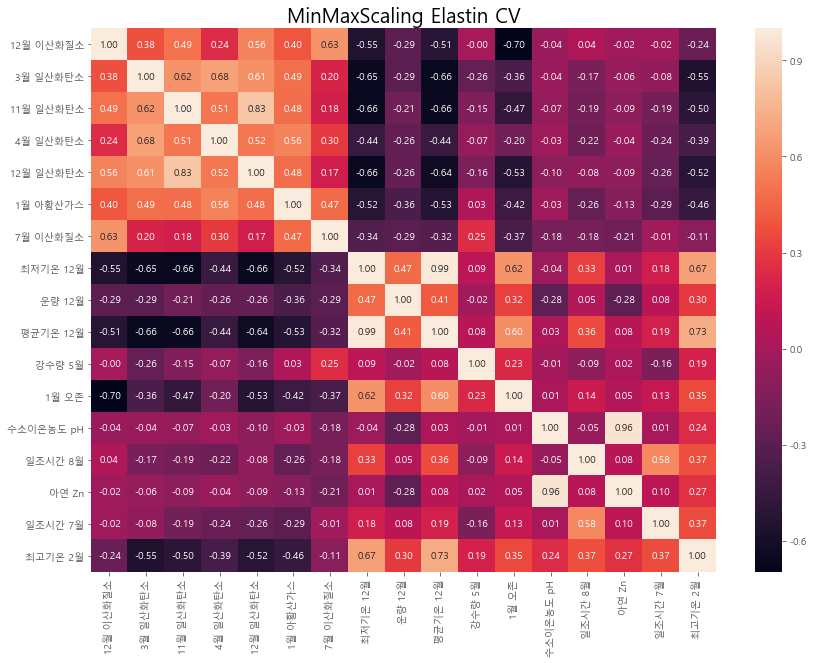

In [60]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(ela_cor, annot=True, fmt='0.2f')
plt.title('MinMaxScaling Elastin CV', fontsize=20)
plt.show()

In [61]:
pop_list=['1월 일산화탄소','4월 이산화질소', '9월 이산화질소','최저기온 12월',
          '평균기온 12월', '수소이온농도 pH', '평균기온 3월','수은 Hg','12월 이산화질소']

In [62]:
col=[i for i in col_list if i not in pop_list]
col

['3월 일산화탄소',
 '11월 일산화탄소',
 '4월 일산화탄소',
 '12월 일산화탄소',
 '1월 아황산가스',
 '7월 이산화질소',
 '운량 12월',
 '강수량 5월',
 '1월 오존',
 '일조시간 8월',
 '아연 Zn',
 '일조시간 7월',
 '최고기온 2월']

In [63]:
X_cor=X_train[col]
X_cor

,3월 일산화탄소,11월 일산화탄소,4월 일산화탄소,12월 일산화탄소,1월 아황산가스,7월 이산화질소,운량 12월,강수량 5월,1월 오존,일조시간 8월,아연 Zn,일조시간 7월,최고기온 2월
131,0.50,0.285714,0.666667,0.375000,0.333333,0.470588,0.065380,0.577022,0.321429,0.476434,1.000000,0.392183,0.776473
3,0.50,0.285714,0.333333,0.250000,0.666667,0.764706,0.540193,0.960649,0.392857,0.640115,0.107025,0.696881,0.784954
4,0.25,0.142857,0.333333,0.125000,0.666667,0.647059,0.356913,0.680512,0.357143,0.966411,0.131710,0.677936,0.853343
134,0.50,0.285714,0.333333,0.250000,0.222222,0.411765,0.570886,0.519119,0.464286,0.575602,0.899707,0.762662,0.901849
123,0.50,0.285714,0.666667,0.250000,0.222222,0.352941,0.147910,0.468885,0.392857,0.456174,0.651649,0.375212,0.438070
37,0.75,0.428571,0.666667,0.375000,0.111111,0.294118,0.786174,0.372922,0.321429,0.505758,0.183383,0.223258,0.553951
8,0.25,0.142857,0.000000,0.125000,0.222222,0.647059,0.313505,0.730845,0.357143,0.697697,0.593115,0.573739,0.741261
101,0.50,0.285714,0.666667,0.375000,0.444444,0.176471,0.188706,0.171780,0.178571,0.734285,0.510804,0.275948,0.692677
28,0.75,0.571429,0.666667,0.375000,0.444444,0.647059,0.451951,0.132442,0.214286,0.760077,0.174582,0.820023,0.332067
109,0.50,0.428571,0.666667,0.250000,0.666667,0.411765,0.443248,0.745793,0.464286,0.221209,0.239943,0.190104,0.374886


In [64]:
corr=X_cor.corr()
corr

,3월 일산화탄소,11월 일산화탄소,4월 일산화탄소,12월 일산화탄소,1월 아황산가스,7월 이산화질소,운량 12월,강수량 5월,1월 오존,일조시간 8월,아연 Zn,일조시간 7월,최고기온 2월
3월 일산화탄소,1.000000,0.617101,0.680713,0.613546,0.485408,0.204908,-0.294388,-0.258294,-0.364494,-0.171623,-0.057799,-0.075967,-0.552903
11월 일산화탄소,0.617101,1.000000,0.514670,0.832006,0.478679,0.182270,-0.210669,-0.147620,-0.470787,-0.192923,-0.090646,-0.193847,-0.502137
4월 일산화탄소,0.680713,0.514670,1.000000,0.520563,0.557624,0.300508,-0.259920,-0.068093,-0.201444,-0.223607,-0.044388,-0.237434,-0.385021
12월 일산화탄소,0.613546,0.832006,0.520563,1.000000,0.480663,0.172617,-0.259695,-0.157603,-0.526475,-0.081885,-0.093277,-0.258410,-0.517425
1월 아황산가스,0.485408,0.478679,0.557624,0.480663,1.000000,0.473119,-0.360243,0.033765,-0.424369,-0.256079,-0.126903,-0.287081,-0.455360
7월 이산화질소,0.204908,0.182270,0.300508,0.172617,0.473119,1.000000,-0.294145,0.250548,-0.369482,-0.182034,-0.210090,-0.014349,-0.113337
운량 12월,-0.294388,-0.210669,-0.259920,-0.259695,-0.360243,-0.294145,1.000000,-0.017416,0.323391,0.051442,-0.277771,0.080213,0.299434
강수량 5월,-0.258294,-0.147620,-0.068093,-0.157603,0.033765,0.250548,-0.017416,1.000000,0.229749,-0.091971,0.019370,-0.162260,0.194468
1월 오존,-0.364494,-0.470787,-0.201444,-0.526475,-0.424369,-0.369482,0.323391,0.229749,1.000000,0.144966,0.049099,0.134348,0.353044
일조시간 8월,-0.171623,-0.192923,-0.223607,-0.081885,-0.256079,-0.182034,0.051442,-0.091971,0.144966,1.000000,0.075118,0.581905,0.374224


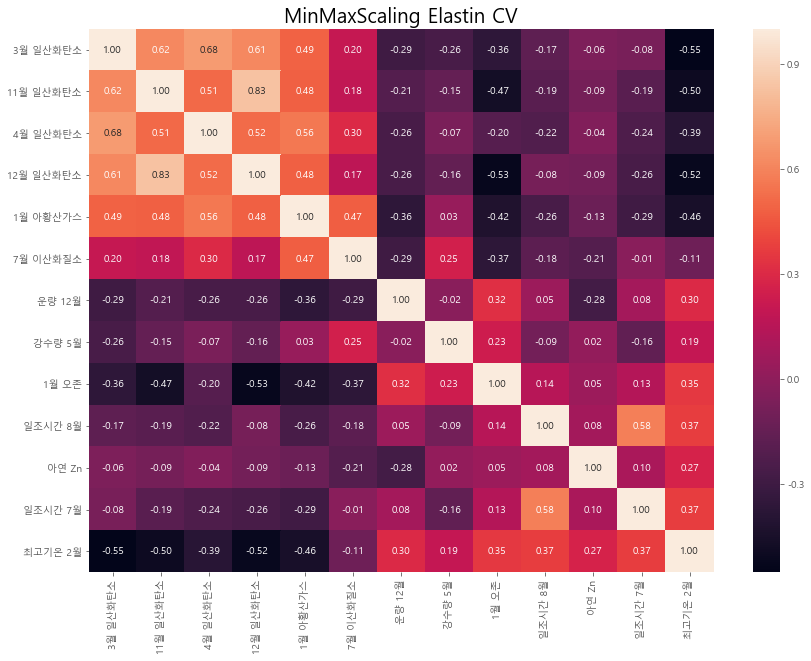

In [65]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt='0.2f')
plt.title('MinMaxScaling Elastin CV', fontsize=20)
plt.show()

In [66]:
X_elastic=X_cor
X_elastic

,3월 일산화탄소,11월 일산화탄소,4월 일산화탄소,12월 일산화탄소,1월 아황산가스,7월 이산화질소,운량 12월,강수량 5월,1월 오존,일조시간 8월,아연 Zn,일조시간 7월,최고기온 2월
131,0.50,0.285714,0.666667,0.375000,0.333333,0.470588,0.065380,0.577022,0.321429,0.476434,1.000000,0.392183,0.776473
3,0.50,0.285714,0.333333,0.250000,0.666667,0.764706,0.540193,0.960649,0.392857,0.640115,0.107025,0.696881,0.784954
4,0.25,0.142857,0.333333,0.125000,0.666667,0.647059,0.356913,0.680512,0.357143,0.966411,0.131710,0.677936,0.853343
134,0.50,0.285714,0.333333,0.250000,0.222222,0.411765,0.570886,0.519119,0.464286,0.575602,0.899707,0.762662,0.901849
123,0.50,0.285714,0.666667,0.250000,0.222222,0.352941,0.147910,0.468885,0.392857,0.456174,0.651649,0.375212,0.438070
37,0.75,0.428571,0.666667,0.375000,0.111111,0.294118,0.786174,0.372922,0.321429,0.505758,0.183383,0.223258,0.553951
8,0.25,0.142857,0.000000,0.125000,0.222222,0.647059,0.313505,0.730845,0.357143,0.697697,0.593115,0.573739,0.741261
101,0.50,0.285714,0.666667,0.375000,0.444444,0.176471,0.188706,0.171780,0.178571,0.734285,0.510804,0.275948,0.692677
28,0.75,0.571429,0.666667,0.375000,0.444444,0.647059,0.451951,0.132442,0.214286,0.760077,0.174582,0.820023,0.332067
109,0.50,0.428571,0.666667,0.250000,0.666667,0.411765,0.443248,0.745793,0.464286,0.221209,0.239943,0.190104,0.374886


In [67]:
X_elastic.reset_index(inplace=True)
X_elastic

,index,3월 일산화탄소,11월 일산화탄소,4월 일산화탄소,12월 일산화탄소,1월 아황산가스,7월 이산화질소,운량 12월,강수량 5월,1월 오존,일조시간 8월,아연 Zn,일조시간 7월,최고기온 2월
0,131,0.50,0.285714,0.666667,0.375000,0.333333,0.470588,0.065380,0.577022,0.321429,0.476434,1.000000,0.392183,0.776473
1,3,0.50,0.285714,0.333333,0.250000,0.666667,0.764706,0.540193,0.960649,0.392857,0.640115,0.107025,0.696881,0.784954
2,4,0.25,0.142857,0.333333,0.125000,0.666667,0.647059,0.356913,0.680512,0.357143,0.966411,0.131710,0.677936,0.853343
3,134,0.50,0.285714,0.333333,0.250000,0.222222,0.411765,0.570886,0.519119,0.464286,0.575602,0.899707,0.762662,0.901849
4,123,0.50,0.285714,0.666667,0.250000,0.222222,0.352941,0.147910,0.468885,0.392857,0.456174,0.651649,0.375212,0.438070
5,37,0.75,0.428571,0.666667,0.375000,0.111111,0.294118,0.786174,0.372922,0.321429,0.505758,0.183383,0.223258,0.553951
6,8,0.25,0.142857,0.000000,0.125000,0.222222,0.647059,0.313505,0.730845,0.357143,0.697697,0.593115,0.573739,0.741261
7,101,0.50,0.285714,0.666667,0.375000,0.444444,0.176471,0.188706,0.171780,0.178571,0.734285,0.510804,0.275948,0.692677
8,28,0.75,0.571429,0.666667,0.375000,0.444444,0.647059,0.451951,0.132442,0.214286,0.760077,0.174582,0.820023,0.332067
9,109,0.50,0.428571,0.666667,0.250000,0.666667,0.411765,0.443248,0.745793,0.464286,0.221209,0.239943,0.190104,0.374886


In [68]:
y_mms=pd.DataFrame(y_mms)
y_mms.reset_index(inplace=True)
y_mms

,index,10a당 생산량 (kg)
0,0,0.688295
1,1,0.720809
2,2,0.566723
3,3,0.844077
4,4,0.703562
5,5,0.606446
6,6,0.728159
7,7,0.535482
8,8,0.365705
9,9,0.589341


In [69]:
elastic_data=pd.merge(X_elastic,
                      y_mms,
                      on='index')
elastic_data

,index,3월 일산화탄소,11월 일산화탄소,4월 일산화탄소,12월 일산화탄소,1월 아황산가스,7월 이산화질소,운량 12월,강수량 5월,1월 오존,일조시간 8월,아연 Zn,일조시간 7월,최고기온 2월,10a당 생산량 (kg)
0,131,0.50,0.285714,0.666667,0.375000,0.333333,0.470588,0.065380,0.577022,0.321429,0.476434,1.000000,0.392183,0.776473,0.726604
1,3,0.50,0.285714,0.333333,0.250000,0.666667,0.764706,0.540193,0.960649,0.392857,0.640115,0.107025,0.696881,0.784954,0.844077
2,4,0.25,0.142857,0.333333,0.125000,0.666667,0.647059,0.356913,0.680512,0.357143,0.966411,0.131710,0.677936,0.853343,0.703562
3,134,0.50,0.285714,0.333333,0.250000,0.222222,0.411765,0.570886,0.519119,0.464286,0.575602,0.899707,0.762662,0.901849,0.830647
4,123,0.50,0.285714,0.666667,0.250000,0.222222,0.352941,0.147910,0.468885,0.392857,0.456174,0.651649,0.375212,0.438070,0.565734
5,37,0.75,0.428571,0.666667,0.375000,0.111111,0.294118,0.786174,0.372922,0.321429,0.505758,0.183383,0.223258,0.553951,0.515409
6,8,0.25,0.142857,0.000000,0.125000,0.222222,0.647059,0.313505,0.730845,0.357143,0.697697,0.593115,0.573739,0.741261,0.365705
7,101,0.50,0.285714,0.666667,0.375000,0.444444,0.176471,0.188706,0.171780,0.178571,0.734285,0.510804,0.275948,0.692677,0.624258
8,28,0.75,0.571429,0.666667,0.375000,0.444444,0.647059,0.451951,0.132442,0.214286,0.760077,0.174582,0.820023,0.332067,0.591320
9,109,0.50,0.428571,0.666667,0.250000,0.666667,0.411765,0.443248,0.745793,0.464286,0.221209,0.239943,0.190104,0.374886,0.485722


In [70]:
elastic_data.drop(['index'],axis=1,inplace=True)
elastic_data

,3월 일산화탄소,11월 일산화탄소,4월 일산화탄소,12월 일산화탄소,1월 아황산가스,7월 이산화질소,운량 12월,강수량 5월,1월 오존,일조시간 8월,아연 Zn,일조시간 7월,최고기온 2월,10a당 생산량 (kg)
0,0.50,0.285714,0.666667,0.375000,0.333333,0.470588,0.065380,0.577022,0.321429,0.476434,1.000000,0.392183,0.776473,0.726604
1,0.50,0.285714,0.333333,0.250000,0.666667,0.764706,0.540193,0.960649,0.392857,0.640115,0.107025,0.696881,0.784954,0.844077
2,0.25,0.142857,0.333333,0.125000,0.666667,0.647059,0.356913,0.680512,0.357143,0.966411,0.131710,0.677936,0.853343,0.703562
3,0.50,0.285714,0.333333,0.250000,0.222222,0.411765,0.570886,0.519119,0.464286,0.575602,0.899707,0.762662,0.901849,0.830647
4,0.50,0.285714,0.666667,0.250000,0.222222,0.352941,0.147910,0.468885,0.392857,0.456174,0.651649,0.375212,0.438070,0.565734
5,0.75,0.428571,0.666667,0.375000,0.111111,0.294118,0.786174,0.372922,0.321429,0.505758,0.183383,0.223258,0.553951,0.515409
6,0.25,0.142857,0.000000,0.125000,0.222222,0.647059,0.313505,0.730845,0.357143,0.697697,0.593115,0.573739,0.741261,0.365705
7,0.50,0.285714,0.666667,0.375000,0.444444,0.176471,0.188706,0.171780,0.178571,0.734285,0.510804,0.275948,0.692677,0.624258
8,0.75,0.571429,0.666667,0.375000,0.444444,0.647059,0.451951,0.132442,0.214286,0.760077,0.174582,0.820023,0.332067,0.591320
9,0.50,0.428571,0.666667,0.250000,0.666667,0.411765,0.443248,0.745793,0.464286,0.221209,0.239943,0.190104,0.374886,0.485722


In [71]:
col_list=['year_local','area','year','10a당 생산량 (kg)']+col
col_list

['year_local',
 'area',
 'year',
 '10a당 생산량 (kg)',
 '3월 일산화탄소',
 '11월 일산화탄소',
 '4월 일산화탄소',
 '12월 일산화탄소',
 '1월 아황산가스',
 '7월 이산화질소',
 '운량 12월',
 '강수량 5월',
 '1월 오존',
 '일조시간 8월',
 '아연 Zn',
 '일조시간 7월',
 '최고기온 2월']

In [72]:
elastic_data=df.loc[:,col_list]
elastic_data

,year_local,area,year,10a당 생산량 (kg),3월 일산화탄소,11월 일산화탄소,4월 일산화탄소,12월 일산화탄소,1월 아황산가스,7월 이산화질소,운량 12월,강수량 5월,1월 오존,일조시간 8월,아연 Zn,일조시간 7월,최고기온 2월
0,2010_부산광역시,부산광역시,2010,7163,0.4,0.466667,0.4,0.466667,0.006,0.017333,3.032258,6.025806,0.021,4.451613,36.433500,2.709677,10.010714
1,2011_부산광역시,부산광역시,2011,7393,0.4,0.500000,0.4,0.500000,0.006,0.017000,2.709677,5.483871,0.023,6.903226,40.263000,5.322581,10.860714
2,2012_부산광역시,부산광역시,2012,6303,0.4,0.400000,0.4,0.400000,0.008,0.016000,3.161290,1.164516,0.022,3.903226,37.487552,5.677419,7.196552
3,2013_부산광역시,부산광역시,2013,8265,0.5,0.500000,0.4,0.500000,0.008,0.019000,3.612903,6.483871,0.022,7.064516,39.935000,7.225806,9.278571
4,2014_부산광역시,부산광역시,2014,7271,0.4,0.400000,0.4,0.400000,0.008,0.017000,2.387097,4.706452,0.021,9.258065,41.049500,7.096774,9.921429
5,2015_부산광역시,부산광역시,2015,6584,0.4,0.400000,0.4,0.400000,0.007,0.017000,3.032258,5.903226,0.020,3.870968,41.924011,6.161290,10.203571
6,2016_부산광역시,부산광역시,2016,7445,0.4,0.400000,0.4,0.500000,0.005,0.016000,3.870968,3.509677,0.022,7.096774,47.105500,6.129032,10.427586
7,2017_부산광역시,부산광역시,2017,6082,0.4,0.400000,0.4,0.500000,0.005,0.017000,3.419355,1.264516,0.024,9.483871,42.516000,7.580645,10.767857
8,2018_부산광역시,부산광역시,2018,4881,0.4,0.400000,0.3,0.400000,0.004,0.017000,2.096774,5.025806,0.021,7.451613,61.881120,6.387097,8.867857
9,2019_부산광역시,부산광역시,2019,6463,0.4,0.400000,0.4,0.400000,0.005,0.016000,3.409091,2.454839,0.023,8.451613,46.895226,9.290323,11.300000
